## EDA Danych dotyczących Irysów

## O Danych

Zbiór danych zawiera informacje o trzech gatunkach irysów: Iris setosa, Iris versicolor, i Iris virginica.

| Iris setosa | Iris versicolor | Iris virginica |
| ----------- | ----------- | ----------- |
| ![Iris setosa](https://ogrodywodne.pl/wp/foto/iris_setosa_kirganune.jpg) | ![Iris versicolor](https://ogrodywodne.pl/wp/foto/iris_versicolor.jpg) | ![Iris virginica](https://ogrodywodne.pl/wp/foto/iris_x_robusta_dark_aura.jpg) |


Dane obejmują pomiary czterech cech: długość i szerokość działki kielicha oraz długość i szerokość płatka.

| Budowa kwiatu |
| ----------- | 
| ![Budowa kwiatu](https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/Flower_Structure_Kwiat_budowa.svg/700px-Flower_Structure_Kwiat_budowa.svg.png) |



Każdy wiersz w zbiorze danych reprezentuje pojedynczy kwiat, a wartości pomiarów są podane w centymetrach.

Zbiór składa się z 150 próbek, po 50 dla każdego gatunku, i jest szeroko stosowany jako podstawowy zbiór danych do
testowania algorytmów klasyfikacji oraz w nauce o danych i uczeniu maszynowym.

Kolumny:
* **długość kielicha (sepal length)** - Długość kielicha w cm
* **szerokość kielicha (sepal width)** - Szerokość kielicha w cm
* **długość płatka (petal length)** - Długość płatka w cm
* **szerokość płatka (petal width)** - Szerokość płatka w cm
* **klasa (class)** - Klasa irysa (setosa, versicolor, virginica)

## Ogólny przegląd danych

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('25__iris.csv', sep=",")

Sprawdzam losowe rekordy w celu uchwyceniu nieprawidłowości, uruchamiam kilka razy

In [43]:
df.sample(5,random_state=13)

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
55,5.7,2.8,4.5,1.3,Iris-versicolor
64,5.6,2.9,3.6,1.3,Iris-versicolor
21,5.1,3.7,1.5,0.4,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
112,6.8,3.0,5.5,2.1,Iris-virginica


Nie zauważyłem żadnych anomalii

## Analiza brakujących wartości

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   długość kielicha (sepal length)   150 non-null    float64
 1   szerokość kielicha (sepal width)  150 non-null    float64
 2   długość płatka (petal length)     150 non-null    float64
 3   szerokość płatka (petal width)    150 non-null    float64
 4   klasa (class)                     150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Dane wyglądają być OK - nie ma danych pustych,

zamieniłem nazwy kolumn aby łatwiej było na nich operować

Kolumny:
* **kd** - długość kielicha (sepal length) - Długość kielicha w cm
* **ks** - szerokość kielicha (sepal width) - Szerokość kielicha w cm
* **pd** - długość płatka (petal length) - Długość płatka w cm
* **ps** - szerokość płatka (petal width) - Szerokość płatka w cm
* **k**  - klasa (class)** - Klasa irysa (setosa, versicolor, virginica)

In [46]:
df_copy = df.copy()
df_copy.rename(columns = {
    'długość kielicha (sepal length)':'kd', # kielich długość
    'szerokość kielicha (sepal width)':'ks', # kielich szerokość
    'długość płatka (petal length)':'pd', # płatek długość
    'szerokość płatka (petal width)':'ps', # płatek szerokość
    'klasa (class)':'k', # klasa
}, inplace = True)
df_copy.sample(5,random_state=13)

,kd,ks,pd,ps,k
55,5.7,2.8,4.5,1.3,Iris-versicolor
64,5.6,2.9,3.6,1.3,Iris-versicolor
21,5.1,3.7,1.5,0.4,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
112,6.8,3.0,5.5,2.1,Iris-virginica


Sprawdzam dane unikalne

In [47]:
df_copy.nunique()

kd    35
ks    23
pd    43
ps    22
k      3
dtype: int64

# Analiza rozkładu ilościowego wg gatunku

In [48]:
df_copy.groupby('k').count()

,kd,ks,pd,ps
k,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


In [49]:
df_copy.groupby('k')['kd'].count()

k
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: kd, dtype: int64

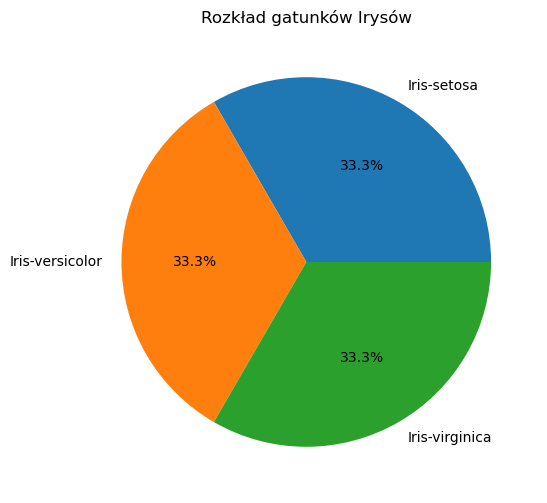

In [50]:
# Tworzenie wykresu kołowego z grupowaniem i dodaniem opcji autopct
ax = df_copy.groupby('k')['kd'].count().plot(
    kind='pie',
    autopct='%1.1f%%',  # Dodaje wartości procentowe
    figsize=(6, 6),     # Wielkość wykresu
    ylabel='',
    title='Rozkład gatunków Irysów'  # Tytuł wykres
)

# Wyświetlenie wykresu
plt.show()

Z każdego rodzaju irysów w zbiorze danych 150 znajduje się równo po 50 

## Analiza pojedyńczych zmiennych

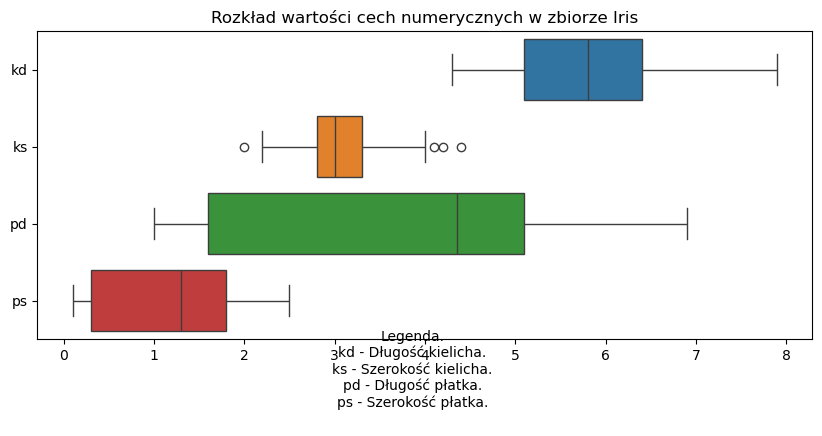

In [84]:
# 3. Wizualizacja rozkładu cech numerycznych
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_copy, orient="h")
plt.title("Rozkład wartości cech numerycznych w zbiorze Iris")
# Dodanie tekstu pod wykresem
plt.figtext(
    0.5, -0.1,  # Pozycja: 0.5 (środek), -0.1 (pod wykresem)
    "Legenda.\n"
    "kd - Długość kielicha.\n"
    "ks - Szerokość kielicha.\n"
    "pd - Długość płatka.\n"
    "ps - Szerokość płatka.\n",
    ha='center',  # Wyrównanie do środka
    fontsize=10  # Rozmiar czcionki
)
plt.show()

Przyjąłem, że jednym z najważniejszych wskaźników jest wielkość płatka

Sprawdzam, czy jest zależność długości kielicha do długości płatka

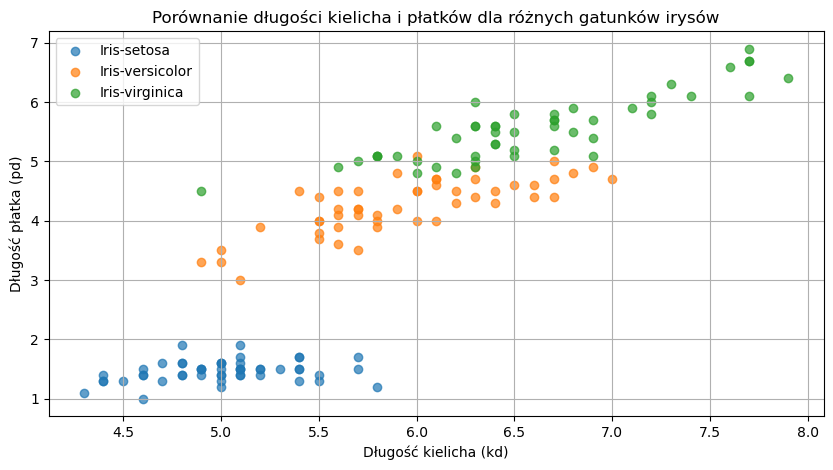

In [73]:
# Filtruj dane dla każdego rodzaju irysów
setosa = df_copy[df_copy['k'] == 'Iris-setosa']
versicolor = df_copy[df_copy['k'] == 'Iris-versicolor']
virginica = df_copy[df_copy['k'] == 'Iris-virginica']

# Tworzenie wspólnego wykresu
plt.figure(figsize=(10, 5))

# Dodajemy dane do wykresu
plt.scatter(setosa['kd'], setosa['pd'], label='Iris-setosa', alpha=0.7)
plt.scatter(versicolor['kd'], versicolor['pd'], label='Iris-versicolor', alpha=0.7)
plt.scatter(virginica['kd'], virginica['pd'], label='Iris-virginica', alpha=0.7)

# Dodajemy tytuł, etykiety osi oraz legendę
plt.title('Porównanie długości kielicha i płatków dla różnych gatunków irysów')
plt.xlabel('Długość kielicha (kd)')
plt.ylabel('Długość płatka (pd)')
plt.legend()
plt.grid(True)

# Wyświetlenie wykresu
plt.show()

Tak im dłuższy kielich, tym dłuższy płatek

Sprawdzam, czy jest zależność szerokości płatka do jego długości

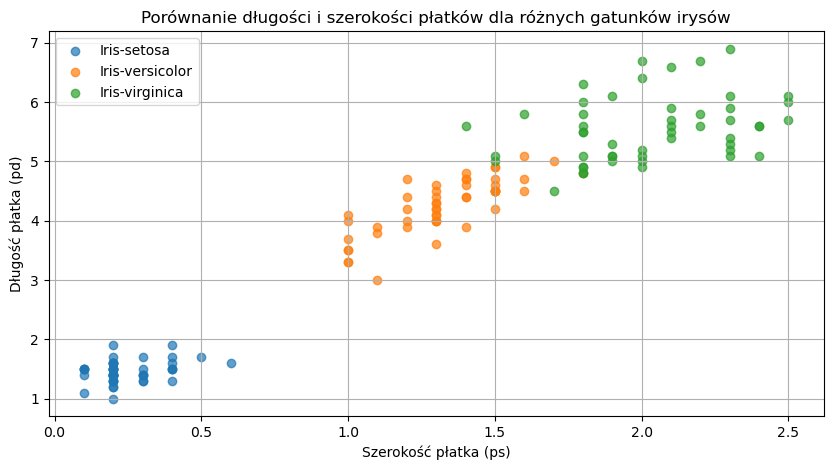

In [74]:
setosa = df_copy[df_copy['k'] == 'Iris-setosa']
versicolor = df_copy[df_copy['k'] == 'Iris-versicolor']
virginica = df_copy[df_copy['k'] == 'Iris-virginica']

plt.figure(figsize=(10, 5))

# Dodajemy dane do wykresu
plt.scatter(setosa['ps'], setosa['pd'], label='Iris-setosa', alpha=0.7)
plt.scatter(versicolor['ps'], versicolor['pd'], label='Iris-versicolor', alpha=0.7)
plt.scatter(virginica['ps'], virginica['pd'], label='Iris-virginica', alpha=0.7)

# Dodajemy tytuł, etykiety osi oraz legendę
plt.title('Porównanie długości i szerokości płatków dla różnych gatunków irysów')
plt.xlabel('Szerokość płatka (ps)')
plt.ylabel('Długość płatka (pd)')
plt.legend()
plt.grid(True)

# Wyświetlenie wykresu
plt.show()


Tak im szerszy płatek, tym jest dłuższy

### Maksymalne wartości cech dla różnych gatunków Irysów

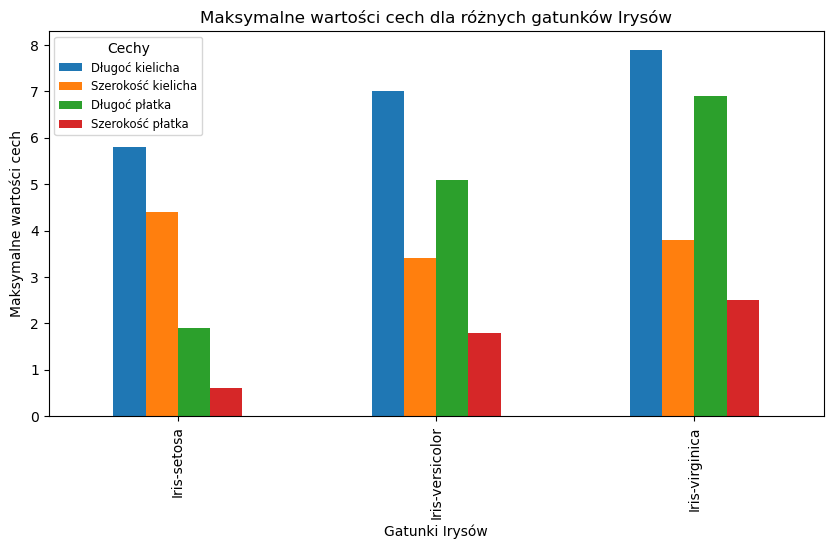

In [75]:
# Tworzenie wykresu słupkowego
ax = df_copy.groupby('k').max().plot(
    kind='bar',
    figsize=(10, 5),  # Ustawienie rozmiaru wykresu
    title='Maksymalne wartości cech dla różnych gatunków Irysów'  # Tytuł wykresu
)
# Dostosowanie legendy
custom_labels = ['Długoć kielicha', 'Szerokość kielicha', 'Długoć płatka', 'Szerokość płatka']  # Dopasuj do swoich kolumn
ax.legend(
    custom_labels,
    title='Cechy',  # Tytuł legendy
    loc='upper left',  # Pozycja legendy
    fontsize='small'  # Rozmiar czcionki w legendzie
)

# Dodanie etykiet osi
plt.xlabel('Gatunki Irysów')
plt.ylabel('Maksymalne wartości cech')

# Wyświetlenie wykresu
plt.show()

Dla rodzaju *Irys setoasa* max długość płatka nie przekracza 2 cm

Sprawdźmy szczegółowo

In [55]:
df_copy.groupby('k').median()

,kd,ks,pd,ps
k,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


## Analiza relacji między zmiennymi

### Macierz korelacji

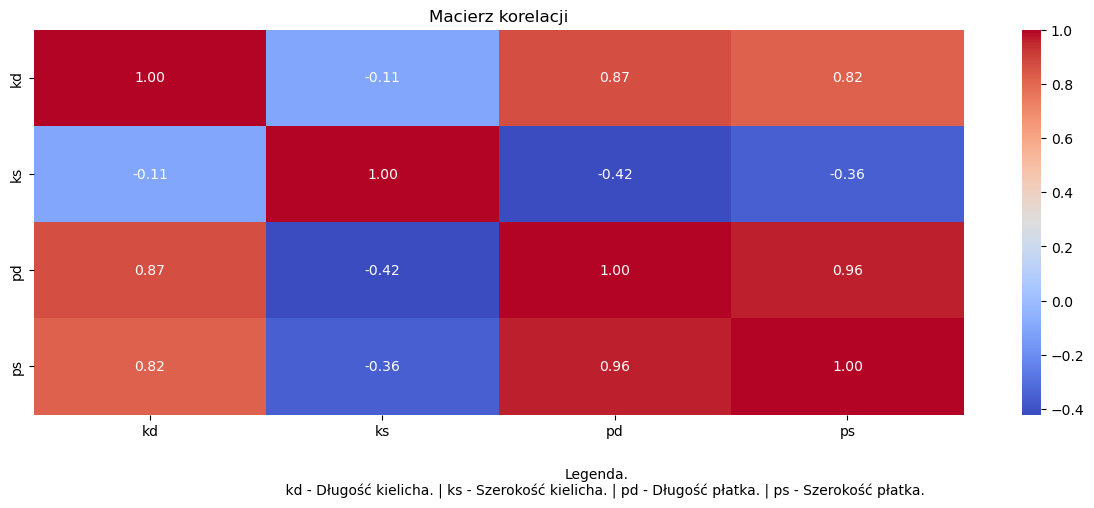

In [96]:
# Wybór tylko kolumn numerycznych
numeric_df = df_copy.select_dtypes(include=['float64', 'int64'])

# Obliczenie macierzy korelacji
correlation_matrix = numeric_df.corr()

# Wizualizacja macierzy korelacji
plt.figure(figsize=(15,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji')

# Dodanie tekstu pod wykresem
plt.figtext(
    0.5, -0.05,  # Pozycja: 0.5 (środek), -0.1 (pod wykresem)
    """Legenda.
    kd - Długość kielicha. | ks - Szerokość kielicha. | pd - Długość płatka. | ps - Szerokość płatka.""",
    ha='center',  # Wyrównanie do środka
    fontsize=10  # Rozmiar czcionki
)

plt.show()

Można zauważyć dużą zależność pomiędzy długością i szerokośćią płatka, jak i długością kielicha, a długością i szerokością płatka

### Rozkład długości i szerokości płatków i kielichów według gatunków

<Figure size 1000x600 with 0 Axes>

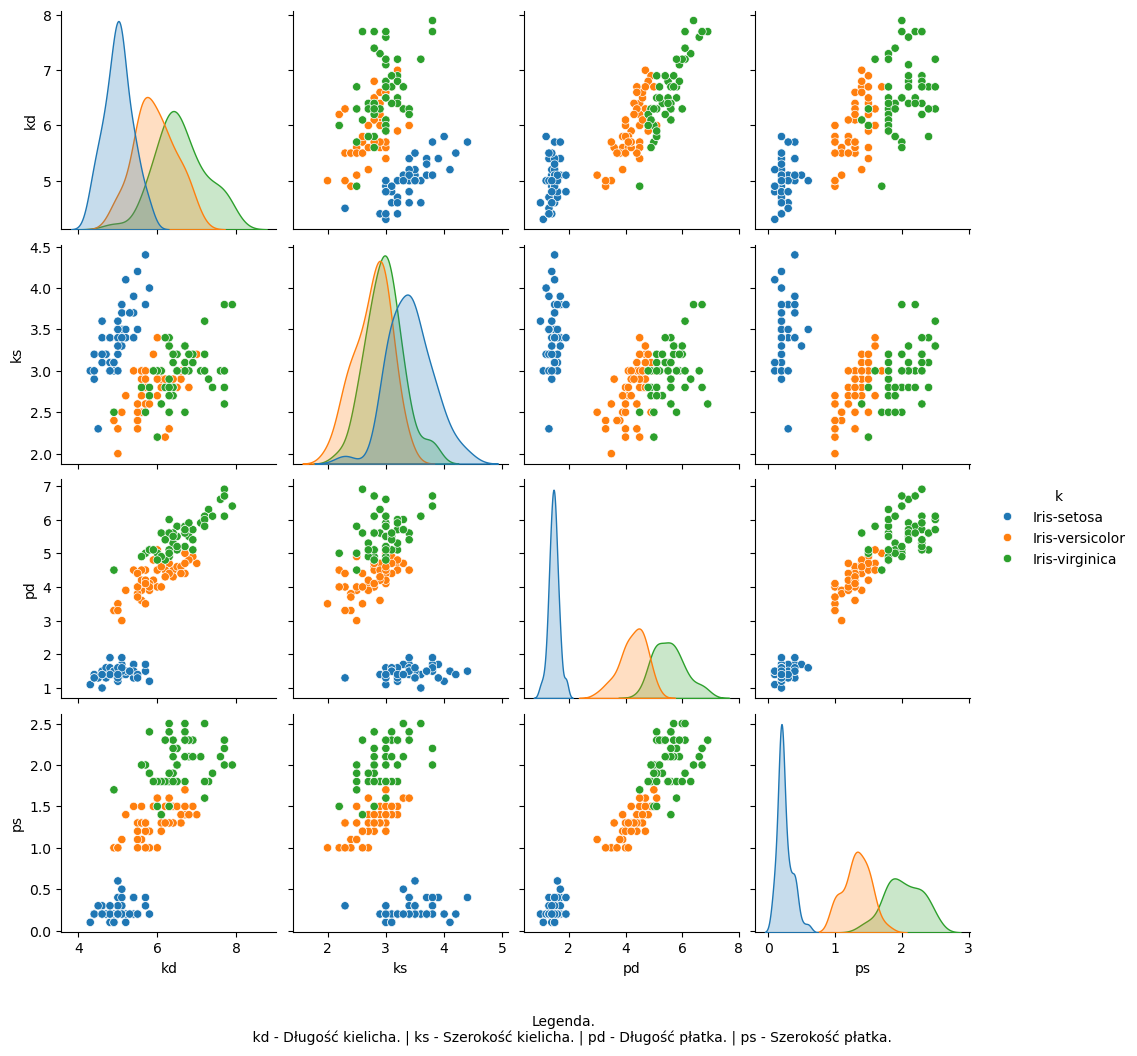

In [99]:
# 5. Rozkład długości i szerokości płatków i kielichów według gatunków
plt.figure(figsize=(10, 6))
# sns.pairplot(df_copy, hue="k")
pairplot = sns.pairplot(df_copy, hue="k")
# Dodanie tekstu pod wykresem
pairplot.fig.text(
    0.5, -0.05,  # Pozycja: 0.5 (środek), -0.1 (pod wykresem)
    """Legenda.
    kd - Długość kielicha. | ks - Szerokość kielicha. | pd - Długość płatka. | ps - Szerokość płatka.""",
    ha='center',  # Wyrównanie do środka
    fontsize=10  # Rozmiar czcionki
)
plt.show()

## Analiza wartości odstających

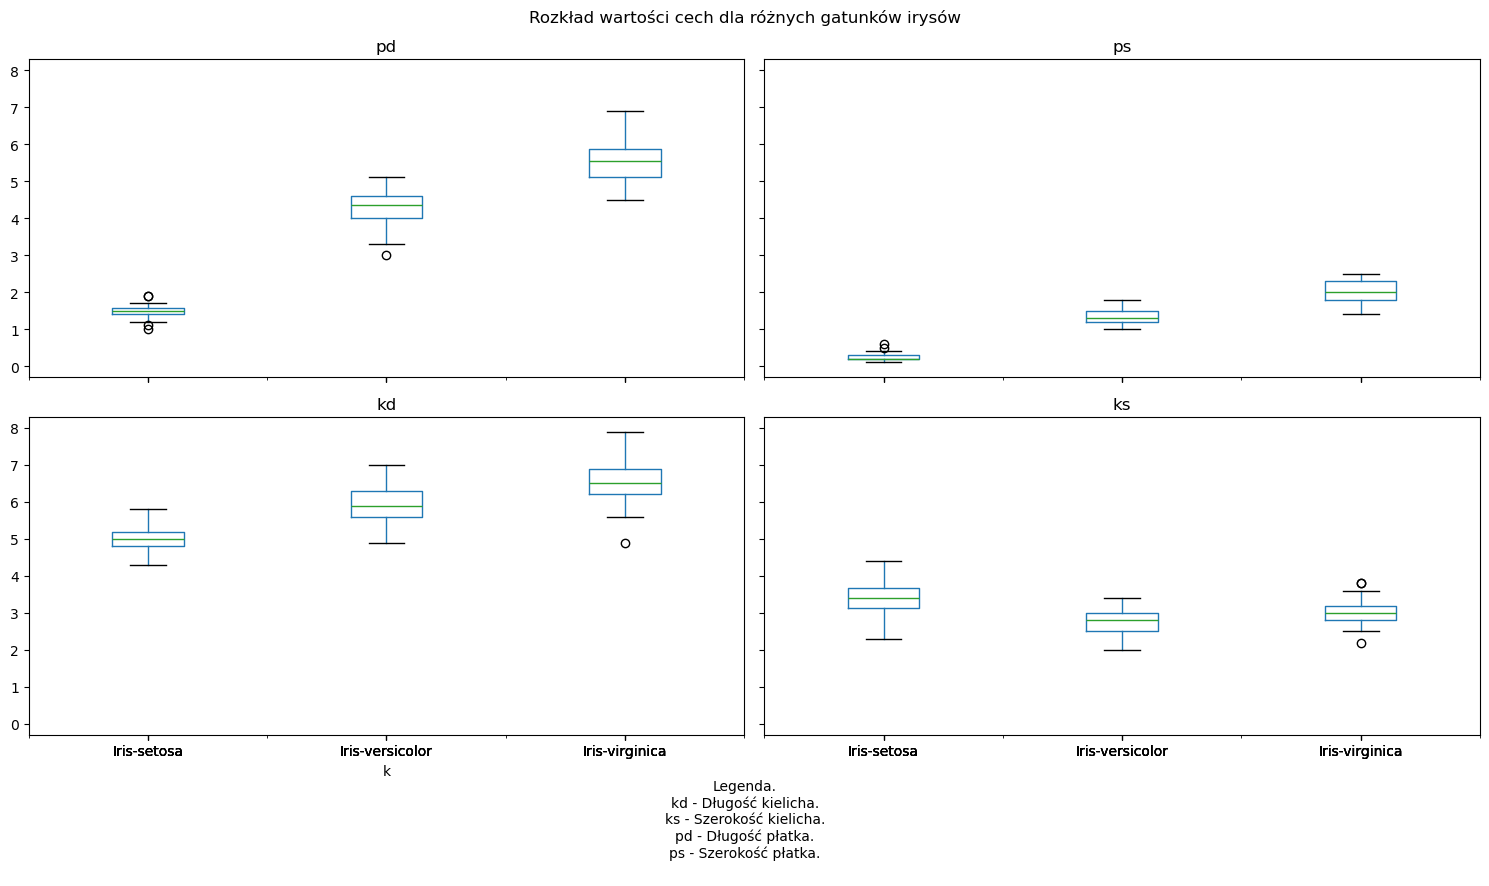

In [81]:
ax = df_copy.boxplot(
    column=['pd', 'ps', 'kd', 'ks'],  # Kolumny numeryczne
    by='k',                           # Grupowanie według kolumny 'k' (gatunki)
    figsize=(15,8),                  # Rozmiar wykresu
    grid=False                        # Wyłączenie siatki dla lepszej czytelności
)

# Dodanie tytułów i opisów osi
plt.suptitle('Rozkład wartości cech dla różnych gatunków irysów')  # Usunięcie automatycznego tytułu
# plt.title('Rozkład wartości cech dla różnych gatunków irysów')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()  # Automatyczne dostosowanie przestrzeni między wykresami

# Dodanie tekstu pod wykresem
plt.figtext(
    0.5, -0.1,  # Pozycja: 0.5 (środek), -0.1 (pod wykresem)
    "Legenda.\n"
    "kd - Długość kielicha.\n"
    "ks - Szerokość kielicha.\n"
    "pd - Długość płatka.\n"
    "ps - Szerokość płatka.\n",
    ha='center',  # Wyrównanie do środka
    fontsize=10  # Rozmiar czcionki
)

# Wyświetlenie wykresu
plt.show()

## Uwagi:

Największe kwiaty posiada rodzaj *Iris-virginica*
- max długość płatków 6.9
- max szerokość płatków 2.5

Potem rodzaj *Iris-versicolor*
- max długość płatków 5.1
- max szerokość płatków 1.8

Najmniejsze kwiaty posiada rodzaj *Iris-setosa*
- max długość płatków 1.9
- max szerokość płatków 0.6

## Raport z analizy EDA dla zbioru Iris:
* Dane zawierają 150 obserwacji podzielonych na trzy gatunki: Iris-setosa, Iris-versicolor, Iris-virginica.
* Nie znaleziono brakujących danych.
* Cechy numeryczne wykazują różnice w rozkładzie pomiędzy gatunkami, co zostało pokazane na wykresach pudełkowych.
* Korelacja między długością i szerokością płatków jest bardzo silna, co sugeruje możliwość uproszczenia modelu predykcyjnego.
* Iris-setosa jest wyraźnie odróżnialna od dwóch pozostałych gatunków pod względem wielkości płatków i kielichów.

## Rekomendacje:
* Wykorzystać cechy petal_length i petal_width do klasyfikacji gatunków, gdyż mają najwyższą wartość separacyjną.
* Rozważyć zastosowanie PCA (analizy głównych składowych) w celu redukcji wymiarów.